In [1]:
import cv2
import numpy as np

# Initialize the camera
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Get the dimensions of the screen
screen_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
screen_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Calculate the position of the rectangle box in the middle of the screen
box_width = 200
box_height = 100
box_x = (screen_width - box_width) // 2
box_y = (screen_height - box_height) // 2

# Counter for naming captured images
image_counter = 1

# Flag to control capture
capture_flag = False

# Create a window
cv2.namedWindow('License Plate Detection')

# Function to handle mouse click events
def on_mouse_click(event, x, y, flags, param):
    global capture_flag
    if event == cv2.EVENT_LBUTTONDOWN and box_x <= x < box_x + box_width and box_y <= y < box_y + box_height:
        capture_flag = True

# Set the mouse callback function for the window
cv2.setMouseCallback('License Plate Detection', on_mouse_click)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        print("Error: Could not read frame.")
        break

    # Create a mask for the license plate box
    mask = np.zeros_like(frame)
    mask[box_y:box_y+box_height, box_x:box_x+box_width] = frame[box_y:box_y+box_height, box_x:box_x+box_width]

    # Apply a blur effect to the mask
    blurred_mask = cv2.GaussianBlur(mask, (15, 15), 0)

    # Combine the original frame and the blurred mask
    output_frame = cv2.addWeighted(frame, 0.7, blurred_mask, 0.3, 0)

    # Draw the predefined rectangular box
    cv2.rectangle(output_frame, (box_x, box_y), (box_x + box_width, box_y + box_height), (255, 0, 0), 2)
    
    # Display the frame with the rectangular box
    cv2.imshow('License Plate Detection', output_frame)

    # Check for key press events
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif capture_flag:
        # Capture and save the image inside the rectangle box
        plate_image = frame[box_y:box_y+box_height, box_x:box_x+box_width]
        filename = f'captured_image_{image_counter}.png'
        cv2.imwrite(filename, plate_image)
        print(f"Image captured and saved as {filename}!")
        image_counter += 1
        capture_flag = False

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


Image captured and saved as captured_image_1.png!
Image captured and saved as captured_image_2.png!


In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import imutils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math


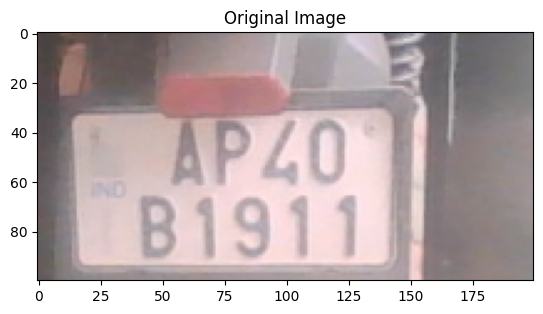

In [8]:
# Read the image file
# Read the image file
image = cv2.imread('captured_image_1.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

In [4]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu121


In [5]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [7]:
import easyocr

# Initialize the reader
reader = easyocr.Reader(['en'])

# Specify the path to the image
IMAGE_PATH = 'captured_image_1.png'

# Read text from the image
result = reader.readtext(IMAGE_PATH, detail=0)

# Merge the lines of text into a single line
single_line_text = ' '.join(result)

# Print the result
print(single_line_text)


APZO Bi9ul
